# ***Tutorial Objective: How To Visualize Signal To Noise Ratio(SNR) of Galaxy Data Cube?***

### Step-0:<span style="color: red">***Download/Access Galaxy Data: SDSS MANGA Observation***</span>

### Step-1:<span style="color:purple ">***Import Required library***</span>

In [7]:
import numpy as np 
import matplotlib.pyplot as plt 
from astropy.io import fits

### Step-2:  <span style="color: blue">***Read/Open Galaxy FITS Data Cube***</span>

In [11]:
cube=fits.open('manga-12510-1902-LINCUBE.fits')  # reads data  cube
# extract information about data cube
cube.info()

Filename: manga-12510-1902-LINCUBE.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      75   ()      
  1  FLUX          1 ImageHDU       100   (34, 34, 6732)   float32   
  2  IVAR          1 ImageHDU        17   (34, 34, 6732)   float32   
  3  MASK          1 ImageHDU        17   (34, 34, 6732)   int32   
  4  LSFPOST       1 ImageHDU        11   (34, 34, 6732)   float32   
  5  LSFPRE        1 ImageHDU        11   (34, 34, 6732)   float32   
  6  WAVE          1 ImageHDU         9   (6732,)   float64   
  7  SPECRES       1 ImageHDU         9   (6732,)   float64   
  8  SPECRESD      1 ImageHDU         9   (6732,)   float64   
  9  PRESPECRES    1 ImageHDU         9   (6732,)   float64   
 10  PRESPECRESD    1 ImageHDU         9   (6732,)   float64   
 11  OBSINFO       1 BinTableHDU    148   12R x 65C   [26A, 17A, 5A, J, I, 8A, E, E, E, E, E, E, J, J, I, J, E, 12A, J, 8A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 13

### Step-3:   <span style="color: green">***Extarct Flux, wavelength and Ivar(Inverse Variance) Cube***</span>

In [23]:
# Extract flux data
flux=cube['FLUX'].data

# IVAR
ivar=cube['IVAR'].data

# extract lambda
lam=cube['WAVE'].data

### Step-4:<span style="color: orange">***Estimate Flux Error:*** </span>
                                            
## <span style="color: orange">***Flux_err=$\sqrt{1/ivar}$***  </span>

In [26]:
flux_err=np.sqrt(1/ivar)
flux_err.shape

C:\Users\JPrakash\AppData\Local\Temp\ipykernel_10536\1705985295.py:1: RuntimeWarning: divide by zero encountered in divide
  flux_err=np.sqrt(1/ivar)


(6732, 34, 34)

### Step-5:  <span style="color: magenta">***Estimate Signal To Noise Ration(SNR) :  SNR Cube=Flux Cube/Flux_err Cube***</span>

In [32]:
snr_cube=flux/flux_err  # snr data cube
snr_cube.shape

(6732, 34, 34)

### Step-6:  <span style="color: cyan">***Visualize SNR 2D Map: At Each Z Pixel or Wavelength axis*** </span>

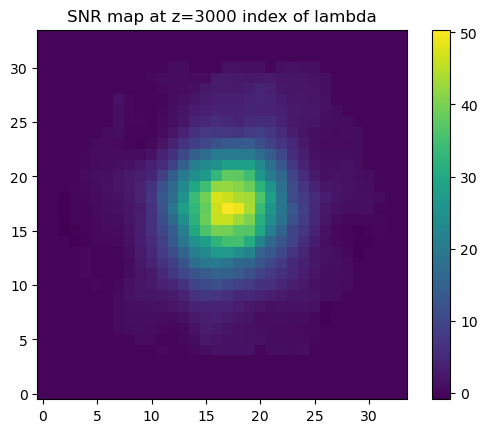

In [44]:
plt.figure()
plt.imshow(snr_cube[3000,:,:],origin='lower')  # snr_cube[Z,Y,X]=snr_cube(X,Y,Z)
plt.colorbar()
plt.title('SNR map at z=3000 index of lambda')
plt.show()

### Step-7:  <span style="color: indigo">***Visualize Spaxel SNR 1D Plot: At Each(X,Y) Pixel*** </span>

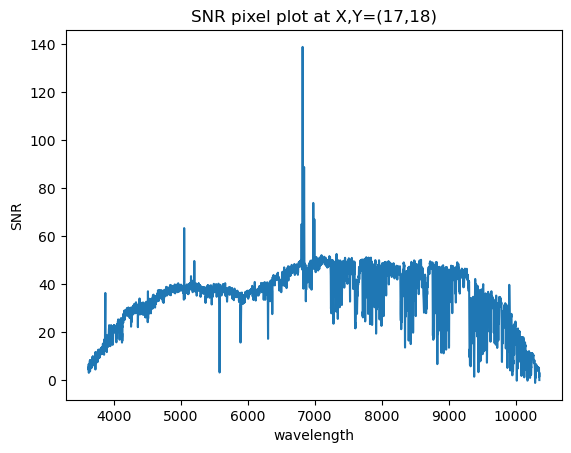

In [57]:
plt.figure()
plt.plot(lam,snr_cube[:,18,17])  # at central spaxel  # snr_cube[:,Y,X] at spectta (X,Y)
plt.title('SNR pixel plot at X,Y=(17,18)')
plt.xlabel('wavelength')
plt.ylabel('SNR')
plt.show()

### Step-8:  <span style="color: violet">***Create SNR Data Cube Map: Save as FITS  Data Cube*** </span>

In [58]:
fits.writeto('snr_cube.fits',snr_cube,overwrite=True)

In [59]:
ls *fits

 Volume in drive C is OS
 Volume Serial Number is 9019-9C71

 Directory of C:\Users\JPrakash\Documents\coding

23-05-2024  19:05         3,427,200 .~r.fits
15-02-2025  12:36         6,405,120 flux_map.fits
03-04-2024  10:53        12,447,360 frame-i-005071-3-0347.fits
25-05-2024  15:54        12,447,360 frame-r-003918-3-0213.fits
03-03-2025  15:39        12,447,360 frame-r-005071-3-0347 (1).fits
03-04-2024  10:54        12,447,360 frame-z-005071-3-0347.fits
25-01-2025  19:30           192,960 fuv_star_cutout.fits
11-05-2024  23:14     1,555,611,840 J0210_cube.fits
05-12-2020  05:44       107,870,400 manga-11863-1901-LOGCUBE.fits
06-12-2020  09:50       158,328,000 manga-12510-1902-LINCUBE.fits
24-05-2024  18:00       442,800,000 manga-7443-12703-LINCUBE.fits
03-12-2020  04:40       514,362,240 manga-7443-12703-LOGCUBE.fits
02-08-2024  22:46         2,203,200 masked_fits.fits
03-08-2024  00:28         2,208,960 masked_pixel.fits
13-09-2024  20:21           129,600 masked_spectrum.fits
2